In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/filefor/processed.hungarian.csv
/kaggle/input/heartdiseasehungariancsv/processed.hungarian (1).csv


In [150]:
data = pd.read_csv("../input/filefor/processed.hungarian.csv", 
                   na_values='?', 
                   names=[ 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                            'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                            'ca', 'thal', 'num'])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


# 2) Data inspecting and Cleaning
**To know the type of feature(Categorical/Numerical)**

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  num       294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [152]:
data.nunique()

age          38
sex           2
cp            4
trestbps     31
chol        153
fbs           2
restecg       3
thalach      71
exang         2
oldpeak      10
slope         3
ca            1
thal          3
num           2
dtype: int64

In [153]:
#there should be only 0-3 unique categories for cp, so the 4th one needs to be replaced by NAN
data.loc[data['cp']==4,"cp"]=np.NaN
data.loc[data['slope']==3,"slope"]=np.NaN
data.nunique()


age          38
sex           2
cp            3
trestbps     31
chol        153
fbs           2
restecg       3
thalach      71
exang         2
oldpeak      10
slope         2
ca            1
thal          3
num           2
dtype: int64

Small numbers are categorical, large ones are numerical. Notice cp unique values changed to 3. 


In [154]:
data.isnull().sum()

age           0
sex           0
cp          123
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       191
ca          291
thal        266
num           0
dtype: int64

**1.1) Missing values will need to be replaced before training our model.(Median for numerical values, most frequent for categorical)**

**Check for duplicate data**

In [155]:
df_duplicate= data.duplicated()
df_duplicate 

0      False
1      False
2      False
3      False
4      False
       ...  
289    False
290    False
291    False
292    False
293    False
Length: 294, dtype: bool

 **No duplicates**

# 3) Data Visualization

Text(0.5, 1.0, 'Class Division')

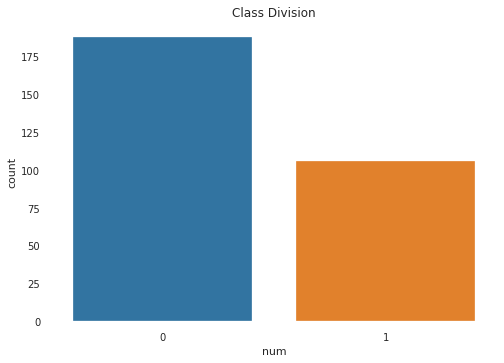

In [156]:
sns.countplot(data=data,x="num").set_title("Class Division")


*Imbalance, will need to stratify when splitting training and test sets*

**Gender distribution**

Text(0.5, 1.0, 'Gender Distribution according to target variable')

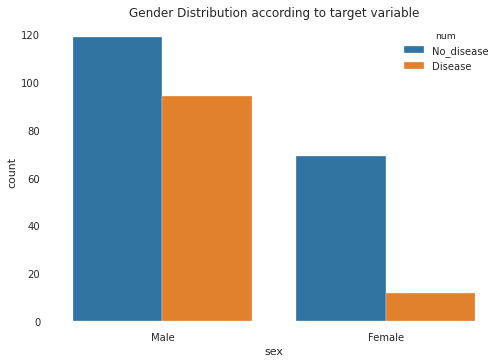

In [157]:
#dataframe with categories labelled
df=data.copy()
df['num'] = df.num.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
df['slope'] = df.slope.replace({0: "upsloping", 1: "flat",2:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})



sns.countplot(data=df,x="sex",hue="num").set_title("Gender Distribution according to target variable")



**Chest pain distribution**

Text(0.5, 1.0, 'Chest pain distribution according to target variable')

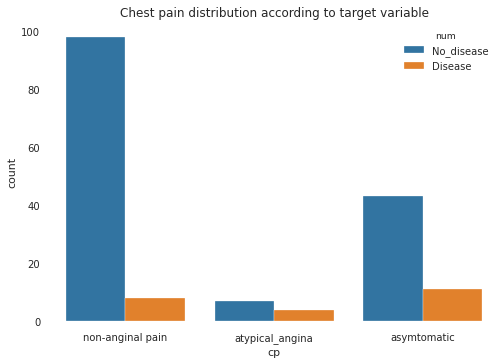

In [158]:
sns.countplot(data=df,x="cp",hue="num").set_title("Chest pain distribution according to target variable")


Text(0.5, 1.0, 'Slope distribution according to target variable')

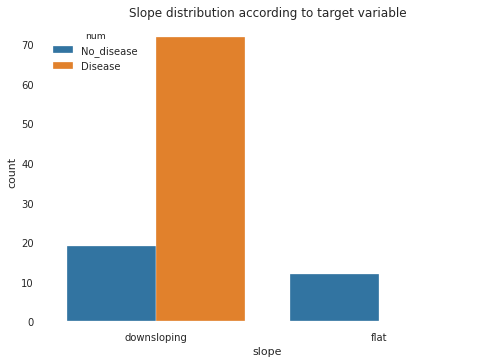

In [159]:
sns.countplot(data=df,x="slope",hue="num").set_title("Slope distribution according to target variable")


Text(0.5, 1.0, 'Age distribution')

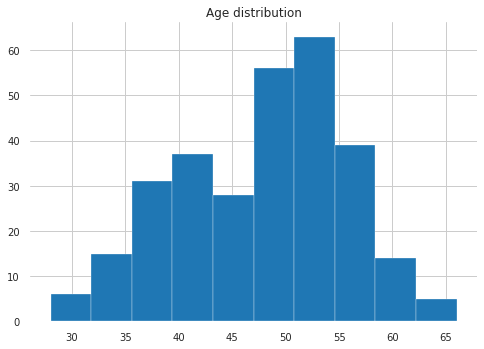

In [160]:
data["age"].hist().plot(kind='bar')
plt.title("Age distribution")


Text(0.5, 1.0, 'Chol')

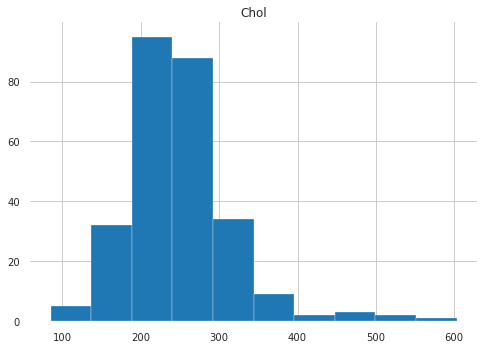

In [161]:
data["chol"].hist().plot(kind='bar')
plt.title("Chol")


Text(0.5, 1.0, 'Thalach')

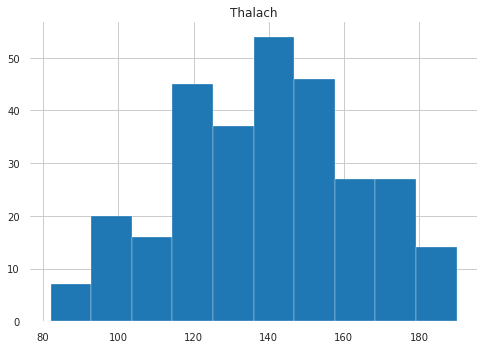

In [162]:
data["thalach"].hist().plot(kind='bar')
plt.title("Thalach")


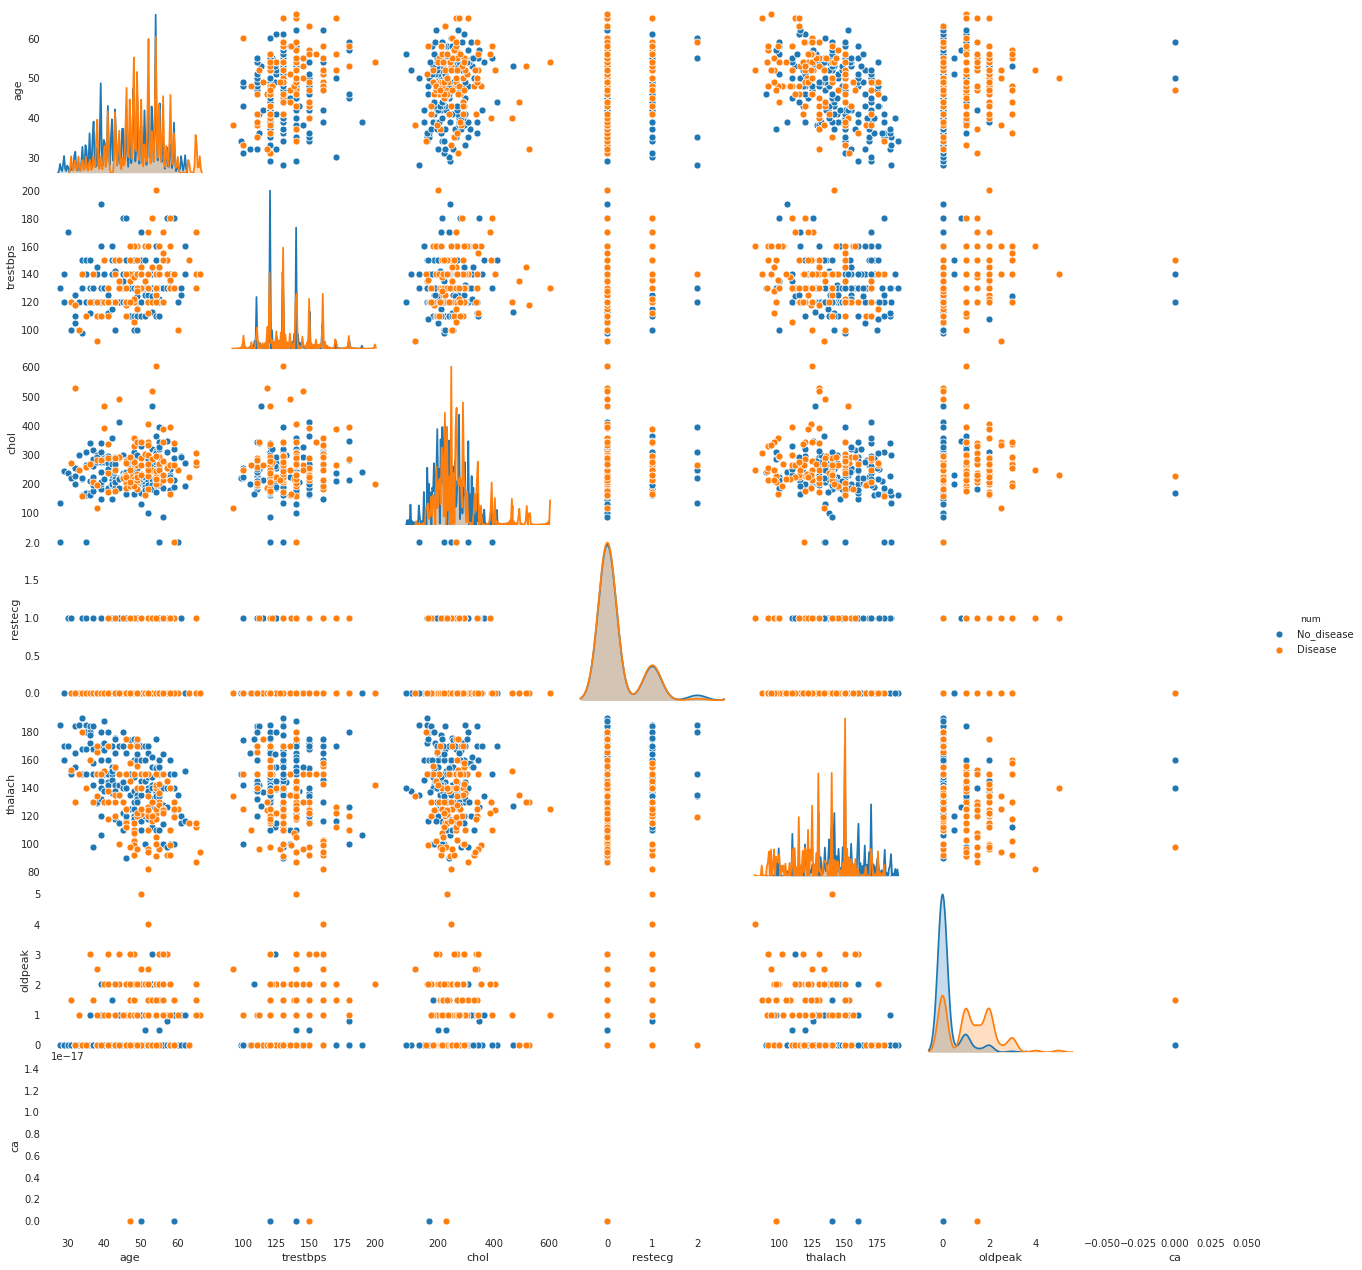

In [163]:
sns.pairplot(data=df,hue="num",diag_kws={'bw': 0.2})

# 4) Profiling Report for the data

In [164]:
from pandas_profiling import ProfileReport

In [165]:
profile=ProfileReport(data)

In [166]:
profile

# 5) Pipeline for heart disease dataset- Machine Learning

**As there are many missing values, we will be using scikit imputer to fill in the missing values while building the pipeline. **

In [167]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

data = data.astype('float64')
# categorical back to int
# using pandas Int64 to keep missing values
data = data.astype({col: 'Int64' for col in [ 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']})
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    Int64  
 2   cp        171 non-null    Int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    Int64  
 6   restecg   293 non-null    Int64  
 7   thalach   293 non-null    float64
 8   exang     293 non-null    Int64  
 9   oldpeak   294 non-null    float64
 10  slope     103 non-null    Int64  
 11  ca        3 non-null      Int64  
 12  thal      28 non-null     Int64  
 13  num       294 non-null    float64
dtypes: Int64(8), float64(6)
memory usage: 34.6 KB


In [212]:
#Advanced pipeline: separate pipelines for numerical and categorical features. Imputing and then preprocessing using StandardScaler and OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = [ 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Both pipelines used in a column transformer, and then placed in the main pipeline that includes the final estimator. 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [216]:
#test pipeline on train and test sets

from sklearn.model_selection import train_test_split

In [217]:
X=data.drop(columns="num")
y=data["num"]
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=31)


**Grid search to find the best parameters for the classification model**

In [218]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'classifier__n_estimators': [20, 50, 100, 200],
             'classifier__max_depth': [1, 2, 3, 5, 7],
             'classifier__max_features': ['auto', 'log2', None]}
grid = GridSearchCV(pipeline, parameter_grid, cv=5, return_train_score=True)

In [219]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalach',
                                                                          

In [221]:
#Scores
print("Best cross validation score:{:.2f}".format(grid.best_score_))
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))


Best cross validation score:0.82
Best params:
{'classifier__max_depth': 2, 'classifier__max_features': None, 'classifier__n_estimators': 100}

Best cross-validation train score: 0.84
Test-set score: 0.80


*Best parameters in the middle of the grid search; no need to change grid search*

**So far we have tested a model using LogisticRegression after imputing and scaling the data. Now we will compare LogisticRegression to RandomForestClassifier with and without scaling.  **

In [222]:
imputer = ColumnTransformer(#imputing only
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
preprocessor = ColumnTransformer(#with scaling and imputing
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])


In [223]:
param_grid = [
    {'classifier': [LogisticRegression(max_iter=1000)], 
     'preprocessor': [preprocessor, imputer],#comparing both preprocessing methods
     'classifier__C': [0.1, 1.0, 10.0, 100.0],
     'classifier__fit_intercept': [True, False],
    'classifier__max_iter':[1000,2000,3000,5000]},
    {'classifier': [RandomForestClassifier(random_state=58)],#to compare with LogisticRegression
     'preprocessor': [preprocessor, imputer], 
    'classifier__n_estimators': [20, 50, 100, 200],
             'classifier__max_depth': [1, 2, 3, 5, 7],
             'classifier__max_features': ['auto', 'log2', None]}]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True,n_jobs=-1)

In [224]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalach',
                                                                          

In [225]:
grid.best_params_

{'classifier': LogisticRegression(max_iter=1000),
 'classifier__C': 1.0,
 'classifier__fit_intercept': True,
 'classifier__max_iter': 1000,
 'preprocessor': ColumnTransformer(transformers=[('num', SimpleImputer(strategy='median'),
                                  ['age', 'trestbps', 'chol', 'thalach',
                                   'oldpeak']),
                                 ('cat', SimpleImputer(strategy='most_frequent'),
                                  ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                   'slope', 'ca', 'thal'])])}

In [226]:



print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation test score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best cross-validation train score: 0.88
Best cross-validation test score: 0.84
Test-set score: 0.84


*LogisticRegression performs better than RandomForestRegressor. Imputing and scaling performs better than imputing only. *